**Prediction on Titanic Dataset**

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with 
an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 
passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than
others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely 
to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [74]:
# dataset Description :

#Survived or not : 0 = No, 1 = Yes , 
#Pclass Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
# Name : Name of the Passenger
# Sex [Gender] : Male & Female
# Age : Age in Years
# SibSp : No. of siblings / spouses aboard the Titanic
# Parch : No. of parents / children aboard the Titanic
# Ticket : Ticket number

# Importing Neccesary Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [2]:
td = pd.read_csv(r"C:\Users\yoges\Downloads\archive (2)\Titanic-Dataset.csv")

In [3]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
td.shape

(891, 12)

In [5]:
td.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
# Target Variable is "Survived" we want to predict how many peoples are died and how many peoples are survived in the sense
# we want to sorts peoples were more likely to survive .

In [7]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning & Data Preprocessing

In [8]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
td.isnull().sum()[td.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
td.isnull().sum()[td.isnull().sum()*100/td.shape[0] > 50]

Cabin    687
dtype: int64

In [11]:
td = td.drop(['Cabin'], axis=1) # -----more then 50% null value hence i have Dopped 'Cabin' column.

In [12]:
td = td.drop(['Name','PassengerId'], axis=1) # ------ Unique column (insignificant variable)

In [13]:
td.Age = td.Age.fillna(td.Age.mean())

In [14]:
td.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
td.Embarked = td.Embarked.fillna('S')

In [16]:
td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
td['Sex'] = le.fit_transform(td['Sex'])

In [20]:
td['Ticket'] = le.fit_transform(td['Ticket'])

In [21]:
td['Embarked'] = le.fit_transform(td['Embarked'])

In [22]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [23]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


# Samplimg Train & Test Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
td_train, td_test = train_test_split(td, test_size=.2)

In [26]:
td_train_x = td_train.iloc[: , 1::]
td_train_y = td_train.iloc[:, 0]

In [27]:
td_test_x = td_test.iloc[: , 1::]
td_test_y = td_test.iloc[: , 0]

In [28]:
td_test_y.value_counts()

Survived
0    112
1     67
Name: count, dtype: int64

# Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logi_td = LogisticRegression()

In [31]:
logi_td.fit(td_train_x,td_train_y)

C:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred = logi_td.predict(td_test_x) # Predicted values
pred


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [33]:
# How to evaluate prediction is correct or not ?
# After prediction you must build confusion matrix and then after evaluating parameters.

# Accuracy
# TPR
# FPR
# F1 Ratio
# AUROC


# Actual Values = target variable columns values

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
td_tab = confusion_matrix(td_test_y, pred)

In [36]:
td_tab

array([[96, 16],
       [22, 45]], dtype=int64)

In [37]:
df = pd.DataFrame(td_tab,columns =['Not Survied','Survied'])
df.index =['Not Survied','Survied']
df

,Not Survied,Survied
Not Survied,96,16
Survied,22,45


In [38]:
# here 90 + 15 = 105 are not survived Actually , but we have correctly predicted 90 are not survived for class 0
# here 25 + 49 = 74 , actually 74 are survived but we have correctly predicted 49 for class 1.

In [39]:
# Accuracy = Total No.of Correct Predicted Values / Total No.of records * 100

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(td_test_y, pred) * 100

78.77094972067039

In [42]:
from sklearn.metrics import recall_score

In [43]:
recall_score(td_test_y, pred) * 100

67.16417910447761

In [44]:
from sklearn.metrics import precision_score

In [45]:
precision_score(td_test_y, pred) * 100

73.77049180327869

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score(td_test_y, pred) * 100

70.3125

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [49]:
pred_proba = logi_td.predict_proba(td_test_x)    

In [50]:
roc_auc_score(td_test_y, pred_proba[:,1]) * 100

81.34328358208957

In [51]:
fpr , tpr , ther = roc_curve(td_test_y, pred_proba[: , 1])

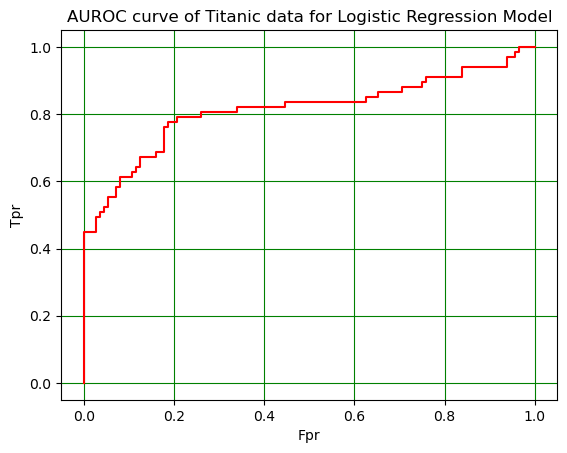

In [52]:
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC curve of Titanic data for Logistic Regression Model')
plt.grid(color='g')

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
td_dc = DecisionTreeClassifier()

In [55]:
td_dc.fit(td_train_x, td_train_y)

DecisionTreeClassifier()

In [56]:
pred = td_dc.predict(td_test_x) # Predicted values
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
td_dc_tab = confusion_matrix(td_test_y, pred)

In [59]:
td_dc_tab

array([[93, 19],
       [20, 47]], dtype=int64)

In [60]:
df1 = pd.DataFrame(td_dc_tab,columns =['Not Survied','Survied'])
df1.index =['Not Survied','Survied']
df1

,Not Survied,Survied
Not Survied,93,19
Survied,20,47


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(td_test_y, pred) * 100

78.2122905027933

In [63]:
from sklearn.metrics import recall_score

In [64]:
recall_score(td_test_y, pred) * 100

70.1492537313433

In [65]:
from sklearn.metrics import precision_score

In [66]:
precision_score(td_test_y, pred) * 100

71.21212121212122

In [67]:
from sklearn.metrics import f1_score

In [68]:
f1_score(td_test_y, pred) * 100

70.67669172932331

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [70]:
pred_proba = td_dc.predict_proba(td_test_x)    

In [71]:
roc_auc_score(td_test_y, pred_proba[:,1]) * 100

77.21215351812364

In [72]:
fpr , tpr , ther = roc_curve(td_test_y, pred_proba[: , 1])

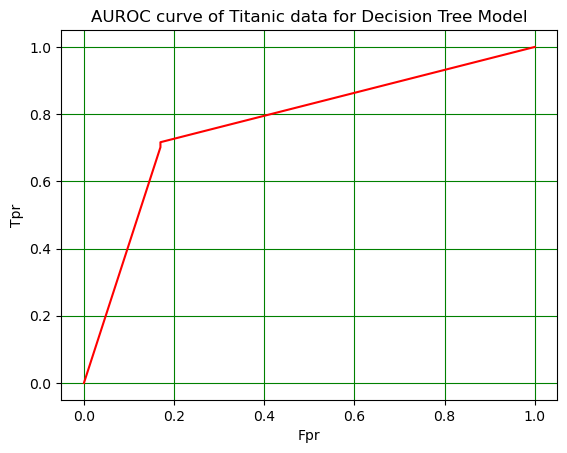

In [73]:
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC curve of Titanic data for Decision Tree Model')
plt.grid(color='g')

In [75]:
# Soo model is performing good for both classes.